**Question-1: Inverse kinematics of RRP stanford manipulator**

In [2]:
import numpy as np

def InverseStanford(px,py,pz,d1,a):
  #px,py,pz are the (x,y,z) coordinates of the end-effector
  # d1= link1 length, a = link2 length, d3=link3 length

  theta1 = np.arctan(py/px)

  s = pz-d1
  r=np.sqrt(px**2+py**2)

  theta2=np.arctan(s/r)

  d3 = np.sqrt(s**2+r**2) - a

  #Radian to degree conversion
  theta1 = (180/np.pi)*theta1
  theta2 = (180/np.pi)*theta2

  print("Theta1 =",theta1)
  print("Theta2 =",theta2)
  print("Link3 length =",d3)

#Input arguement in the InverseStanford function (px,py,pz,d1,a)
#where (px,py,pz) = coordinates of end-effector and d1=length of link1 and a=length of link2

#Example 1
print("Example-1 output")
InverseStanford(10,15,12,5,10)
#Example 2
print("\nExample-2 output")
InverseStanford(5,7,15,8,4)
#Example 3
print("\nExample-3 output")
InverseStanford(7,10,13,10,6)


Example-1 output
Theta1 = 56.309932474020215
Theta2 = 21.22070022359343
Link3 length = 9.339079605813716

Example-2 output
Theta1 = 54.46232220802562
Theta2 = 39.13640310078393
Link3 length = 7.090536506409418

Example-3 output
Theta1 = 55.00797980144134
Theta2 = 13.807889908837263
Link3 length = 6.5698050899765335


**Plugging these values in the earlier forward kinematics code gives us the same position that has been used in this code as Input. Hence Verified.**

**RRP stanford forward kinematics code-**
https://colab.research.google.com/drive/1OA_XCIQ4PMDP6V1s-vzhnNLmFr7uyGNG?usp=sharing

**Question-2: Inverse kinematics of RRP scara manipulator**

In [4]:
import numpy as np

def InverseScara(px,py,pz,a1,a2):
  #px,py,pz are the (x,y,z) coordinates of the end-effector
  # a1= link1 length, a2 = link2 length, =link3 length
  
  d = pz

  B=px**2+py**2 - (a1**2+a2**2)
  H=2*a1*a2
  P=np.sqrt(H**2-B**2)

  q2 = np.arctan(P/B)

  q1 = np.arctan(py/px) -np.arctan((a2*np.sin(q2))/(a1+a2*np.cos(q2)))


  #Radian to degree conversion
  q1 = (180/np.pi)*q1
  q2 = (180/np.pi)*q2

  print("q1 =",q1)
  print("q2 =",q2)
  print("Link3 length =",d)

#Input arguement in the InverseScara function (px,py,pz,a1,a2)
#where (px,py,pz) = coordinates of end-effector and a1=length of link1 and a2=length of link2
#Example 1
print("Example-1 output")
InverseScara(5,4,7,4,3)
#Example 2
print("\nExample-2 output")
InverseScara(5,7,15,6,4)
#Example 3
print("\nExample-3 output")
InverseScara(7,10,13,10,6)


Example-1 output
q1 = 18.220490680831848
q2 = 48.18968510422141
Link3 length = 7

Example-2 output
q1 = 30.051623027966727
q2 = 62.72038726402191
Link3 length = 15

Example-3 output
q1 = 25.756336827702402
q2 = 83.78075155711913
Link3 length = 13


**Plugging these values in the earlier forward kinematics code gives us the same position that has been used in this code as Input. Hence Verified.**

**RRP stanford forward kinematics code** -https://colab.research.google.com/drive/1tOg04zQDs-6PaTobZ3N26IvFGl7HMOBq?usp=sharing

**Question-3: Inverse kinematics to determine cartesian velocities**

In [21]:
import numpy as np
import sys

def Jacobian_calculator(n,dh,J_type_ar):
  A=[]

  for i in range(1,n+1):
      theta=dh[i-1][0]
      d=dh[i-1][1]
      a=dh[i-1][2]
      alpha=dh[i-1][3]

      theta=theta*(np.pi)/180
      alpha=alpha*(np.pi)/180

      row1 = [np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)]
      row2 = [np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)]
      row3 = [0, np.sin(alpha), np.cos(alpha), d]
      row4 = [0, 0 ,0, 1]

      A_i = [row1, row2, row3, row4]
      A = A + [A_i]
   
  T = ([1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1])
  R = []
  z=[[0,0,1]]
  O=[[0,0,0]]
  for i in range(0,len(A)):
    T=np.dot(T,A[i])
    R_c=[[T[0][0],T[0][1],T[0][2]],[T[1][0],T[1][1],T[1][2]],[T[2][0],T[2][1],T[2][2]]]
    z_c=np.dot(R_c,[[0],[0],[1]])
    z = z+[[z_c[0][0],z_c[1][0],z_c[2][0]]]
    R=R+[R_c]
    O=O+[[T[0][3],T[1][3],T[2][3]]]

  Jv = []
  Jw = []
  for i in range(0+1,n+1):
    if(J_type_ar[i-1]==1):
      J_i=np.cross(np.array(z[i-1]),np.subtract(O[n],O[i-1]))
      Jv = Jv+[J_i]
      Jw = Jw + [z[i-1]]
    elif(J_type_ar[i-1]==0):
      J_i=np.array(z[i-1])
      Jv = Jv+[J_i]
      Jw = Jw + [[0,0,0]]
    else:
      print("please enter only 0 or 1")
      i=i-1

  Jv=np.around(np.transpose(np.array(Jv)),3)
  Jw=np.around(np.transpose(np.array(Jw)),3)
  J=Jv
  J=np.append(J,[np.array(Jw[0])],axis=0)
  J=np.append(J,[np.array(Jw[1])],axis=0)
  J=np.append(J,[np.array(Jw[2])],axis=0)

  return(J)
  

def joint_velocity_calculator(v,n,dh,J_type_ar):
  # v = list of end-effector cartesian velocities
  J=Jacobian_calculator(n,dh,J_type_ar)
  J_inverse = np.linalg.pinv(J)
  joint_v = np.dot(J_inverse,v)
  print(np.around(joint_v,2)) 

# joint_velocity_calculator inputs: v=cartesian velocity(Xdot), n=number of links
#dh=matrix of dh parameters, J_type_ar=matrix of joint types(1 for revolute and 0 for prismatic) 

print("Verification for RRP STANFORD")
v=[-803.04,53.04,0,0,0,25]
n=3
dh =[[45,0,5,0],[-45,0,0,-90],[0,30,0,0]]
J_type_ar=[1,1,0]
print("(q1dot,q2dot,q3dot)=")
joint_velocity_calculator(v,n,dh,J_type_ar)

print("\nVerification for RRP SCARA")
v=[-282.84,-70.71,0,0,0,25]
n=3
dh =[[45,0,10,0],[90,0,10,0],[0,-25,0,180]]
J_type_ar=[1,1,0]
print("(q1dot,q2dot,q3dot)=")
joint_velocity_calculator(v,n,dh,J_type_ar)

print("\nFor RRRRRR manipulator")
v=[0,48,96,12,-18,12]
n=6
dh =[[0,0,0,90],[0,0,3,0],[0,0,3,0],[0,0,0,-90],[90,0,0,90],[0,3,0,0]]
J_type_ar=[1,1,1,1,1,1]
print("(q1dot,q2dot,q3dot,q4dot,q5dot,q6dot)=")
joint_velocity_calculator(v,n,dh,J_type_ar)

Verification for RRP STANFORD
(q1dot,q2dot,q3dot)=
[15. 10. -0.]

Verification for RRP SCARA
(q1dot,q2dot,q3dot)=
[15. 10.  0.]

For RRRRRR manipulator
(q1dot,q2dot,q3dot,q4dot,q5dot,q6dot)=
[ 2.  4.  6.  8. 10. 12.]


**Question-6 Spherical wrist inverse kinematics**

In [8]:
import numpy as np

def wrist_IK(R):
  if(R[0][2]==0 and R[1][2]==0):
    print("there are infinitely many solutions")
    if(R[2][2]==1):
      theta1=0
      phi1=0
      si1=np.arctan(R[1][0]/R[0][0])
      print("One possible solutin,(theta,phi,si)=(",theta1*180/np.pi,phi1*180/np.pi,si1*180/np.pi,")")

    if(R[2][2]==-1):
      theta1=np.pi
      phi1=0
      si1=np.arctan(R[1][0]/R[0][0])
      print("One possible solutin,(theta,phi,si)=(",theta1*180/np.pi,phi1*180/np.pi,si1*180/np.pi,")")
  else:
    print("2 solutions possible")
    theta1 = np.arctan(np.sqrt(1-R[2][2]**2)/R[2][2])
    phi1 = np.arctan(R[1][2]/R[0][2])
    si1= np.arctan(R[2][1]/(-R[2][0]))
    print("First solution,(theta,phi,si)=(",theta1*180/np.pi,phi1*180/np.pi,si1*180/np.pi,")")
    
    theta2 = np.arctan(-np.sqrt(1-R[2][2]**2)/R[2][2])
    phi2 = np.arctan(R[1][2]/R[0][2])
    si2= np.arctan((-R[2][1])/R[2][0])
    print("Second solution,(theta,phi,si)=(",theta2*180/np.pi,phi2*180/np.pi,si2*180/np.pi,")")

# wrist_IK is a function to determine the inverse kinematics of a spherical wrist i.e gives eular angles as output
# input parameters is a Rotation matrix that transforms the vectors of frame on the last link to the base frame at the wrist centre

#Example 1
print("Example-1 output")
wrist_IK(np.array([[-0.3062,-0.9186,0.25],[0.8839,-0.1768,0.4330],[-0.3536,0.3536,0.866]]))
#Example 2
print("\nExample-2 output")
wrist_IK(np.array([[-0.3062,-0.9186,0],[0.8839,-0.1768,0],[-0.3536,0.3536,1]]))
#Example 3
print("\nExample-3 output")
wrist_IK(np.array([[-0.3062,-0.9186,0],[0.8839,-0.1768,0],[-0.3536,0.3536,-1]]))

Example-1 output
2 solutions possible
First solution,(theta,phi,si)=( 30.00291093118803 59.99927221917263 45.0 )
Second solution,(theta,phi,si)=( -30.00291093118803 59.99927221917263 45.0 )

Example-2 output
there are infinitely many solutions
One possible solutin,(theta,phi,si)=( 0.0 0.0 -70.89292826867789 )

Example-3 output
there are infinitely many solutions
One possible solutin,(theta,phi,si)=( 180.0 0.0 -70.89292826867789 )


**Question-7: 3D printer(PPP configuration)**

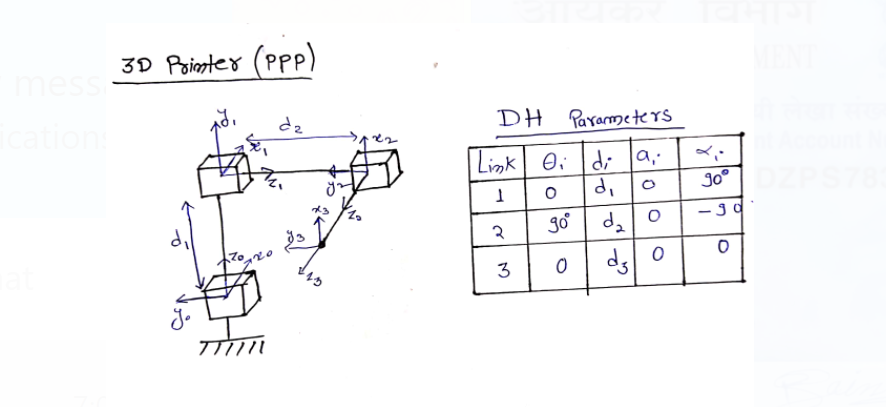

**Below is the code of the forward kinematics and jacobian of of any manupulator that can be used to determine the position and velocity of the 3D printer(PPP).**

In [14]:
import numpy as np

def kinamatics_PJV(n,dh,J_type_ar,omega):
  A=[]

  for i in range(1,n+1):
      theta=dh[i-1][0]
      d=dh[i-1][1]
      a=dh[i-1][2]
      alpha=dh[i-1][3]

      theta=theta*(np.pi)/180
      alpha=alpha*(np.pi)/180

      row1 = [np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)]
      row2 = [np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)]
      row3 = [0, np.sin(alpha), np.cos(alpha), d]
      row4 = [0, 0 ,0, 1]

      A_i = [row1, row2, row3, row4]
      A = A + [A_i]

  omega=np.transpose(np.array(omega))
     
  T = ([1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1])
  R = []
  z=[[0,0,1]]
  O=[[0,0,0]]
  for i in range(0,len(A)):
    T=np.dot(T,A[i])
    R_c=[[T[0][0],T[0][1],T[0][2]],[T[1][0],T[1][1],T[1][2]],[T[2][0],T[2][1],T[2][2]]]
    z_c=np.dot(R_c,[[0],[0],[1]])
    z = z+[[z_c[0][0],z_c[1][0],z_c[2][0]]]
    R=R+[R_c]
    O=O+[[T[0][3],T[1][3],T[2][3]]]

  Jv = []
  Jw = []
  for i in range(0+1,n+1):
    if(J_type_ar[i-1]==1):
      J_i=np.cross(np.array(z[i-1]),np.subtract(O[n],O[i-1]))
      Jv = Jv+[J_i]
      Jw = Jw + [z[i-1]]
    elif(J_type_ar[i-1]==0):
      J_i=np.array(z[i-1])
      Jv = Jv+[J_i]
      Jw = Jw + [[0,0,0]]
    else:
      print("please enter only 0 or 1")
      i=i-1

  Jv=np.around(np.transpose(np.array(Jv)),3)
  Jw=np.around(np.transpose(np.array(Jw)),3)
  J=Jv
  J=np.append(J,[np.array(Jw[0])],axis=0)
  J=np.append(J,[np.array(Jw[1])],axis=0)
  J=np.append(J,[np.array(Jw[2])],axis=0)

  vel = np.dot(J,omega)
  print("J = ",np.around(J,3))
  
  print("End-effector position =",np.around([T[0][3],T[1][3],T[2][3]],3))
  print("End-effector velocity = ",np.transpose(np.around(vel,3)))

# kinamatics_PJV is a function that gives the Jacobian, End-effector position and end-effector cartesian veloctiy for any manipulator
# kinamatics_PJV function inputs: n=number of links, dh=matrix of dh parameters, J_type_ar=matrix of joint types(1 for revolute and 0 for prismatic), omega=matrix of angular velocities of links

#Example1, dh parameter(theta,dz,ax,alpha) = [[0,2,0,90],[90,5,0,-90],[0,3,0,0]] 
n=3
dh =[[0,2,0,90],[90,5,0,-90],[0,3,0,0]]
J_type_ar=[0,0,0]
omega=[0,0,0]
print("example-1 output")
kinamatics_PJV(n,dh,J_type_ar,omega)

#Example2, dh parameter(theta,dz,ax,alpha) = [[0,4,0,90],[90,7,0,-90],[0,6,0,0]] 
n=3
dh =[[0,4,0,90],[90,7,0,-90],[0,6,0,0]]
J_type_ar=[0,0,0]
omega=[0,0,0]
print("\nexample-2 output")
kinamatics_PJV(n,dh,J_type_ar,omega)

#Example3, dh parameter(theta,dz,ax,alpha) = [[0,15,0,90],[90,5,0,-90],[0,13,0,0]] 
n=3
dh =[[0,15,0,90],[90,5,0,-90],[0,13,0,0]]
J_type_ar=[0,0,0]
omega=[0,0,0]
print("\nexample-3 output")
kinamatics_PJV(n,dh,J_type_ar,omega)

example-1 output
J =  [[ 0.  0. -1.]
 [ 0. -1. -0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
End-effector position = [-3. -5.  2.]
End-effector velocity =  [0. 0. 0. 0. 0. 0.]

example-2 output
J =  [[ 0.  0. -1.]
 [ 0. -1. -0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
End-effector position = [-6. -7.  4.]
End-effector velocity =  [0. 0. 0. 0. 0. 0.]

example-3 output
J =  [[ 0.  0. -1.]
 [ 0. -1. -0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
End-effector position = [-13.  -5.  15.]
End-effector velocity =  [0. 0. 0. 0. 0. 0.]


**Question-8 3D printer Inverse kinematics**

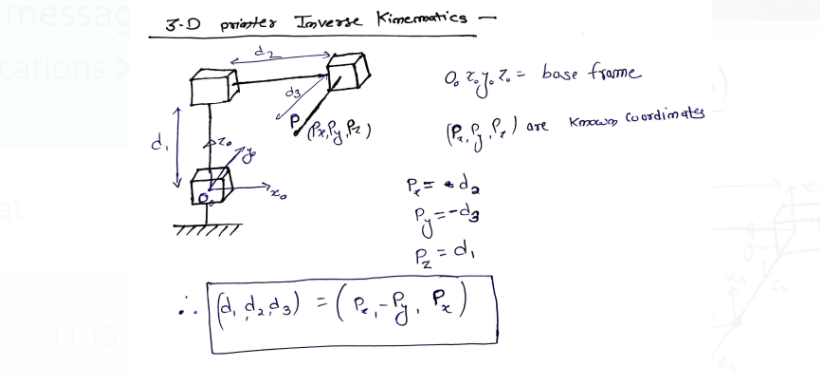